In [1]:
import numpy as np
import pandas as pd

In [2]:
!conda install -c anaconda xlrd --yes

Solving environment: ...working... done

# All requested packages already installed.



In [6]:
canada_immigration = pd.read_excel(
    "data/Canada.xlsx"
    ,sheet_name="Canada by Citizenship"
    ,skiprows=range(20)
    ,skipfooter=2
)

In [7]:
canada_immigration.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [8]:
canada_immigration.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


In [9]:
canada_immigration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [10]:
canada_immigration.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [11]:
canada_immigration.shape

(195, 43)

In [12]:
canada_immigration.drop(["Type", "Coverage", "AREA", 'REG', 'DEV'],axis=1, inplace=True)

In [13]:
canada_immigration.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [14]:
canada_immigration.rename(columns={"OdName": "Country", "AreaName": 'Continent', "RegName": "Region"}, inplace=True)

In [15]:
canada_immigration['Total'] = canada_immigration.sum(axis=1)

C:\Users\Dwi\AppData\Local\Temp\ipykernel_10188\3404531141.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  canada_immigration['Total'] = canada_immigration.sum(axis=1)


In [16]:
canada_immigration[canada_immigration['Continent'] == 'Asia']

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
8,Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
11,Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,...,359,236,203,125,165,209,138,161,57,2649
13,Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,...,12,12,22,9,35,28,21,39,32,475
14,Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
20,Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,...,5,10,7,36,865,1464,1879,1075,487,5876
25,Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,...,4,5,11,10,5,12,6,3,6,600
30,Cambodia,Asia,South-Eastern Asia,Developing regions,12,19,26,33,10,7,...,370,529,460,354,203,200,196,233,288,6538
36,China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
37,"China, Hong Kong Special Administrative Region",Asia,Eastern Asia,Developing regions,0,0,0,0,0,0,...,729,712,674,897,657,623,591,728,774,9327


In [17]:
canada_immigration.shape

(195, 39)

In [18]:
canada_immigration["Country"].nunique()

195

In [19]:
canada_immigration.set_index("Country", inplace=True)

In [20]:
canada_immigration.loc["Indonesia", :]

Continent                  Asia
Region       South-Eastern Asia
DevName      Developing regions
1980                        186
1981                        178
1982                        252
1983                        115
1984                        123
1985                        100
1986                        127
1987                        213
1988                        270
1989                        260
1990                        227
1991                        252
1992                        243
1993                        278
1994                        262
1995                        205
1996                        231
1997                        166
1998                        165
1999                        525
2000                       1138
2001                        907
2002                        709
2003                        515
2004                        552
2005                        632
2006                        613
2007                        657
2008    

# Visualisasi

In [21]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

# plt.show()

In [22]:
print(plt.style.available)
mpl.style.use(['ggplot'])

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


# Line Chart

In [23]:
years =  range(1980, 2014)

haiti = canada_immigration.loc['Haiti', years]

In [24]:
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

<AxesSubplot:>

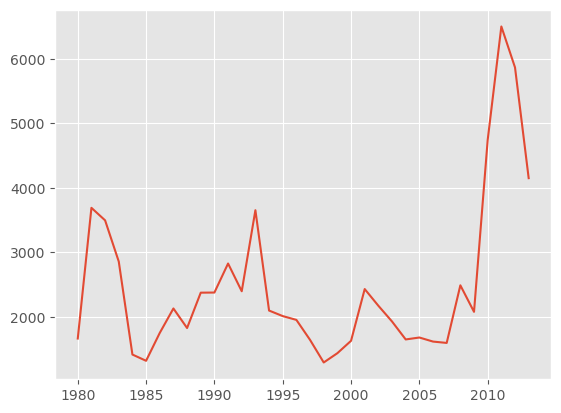

In [25]:
haiti.plot()

Text(2000, 6000, '2010 Earthquake')

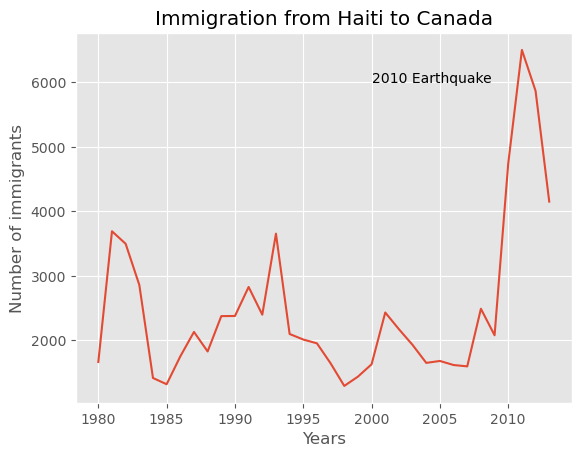

In [26]:
haiti.plot(kind='line')
plt.title("Immigration from Haiti to Canada")
plt.xlabel('Years')
plt.ylabel('Number of immigrants')

plt.text(2000,6000, '2010 Earthquake')

In [27]:
compare_data = canada_immigration.loc[['China', 'India','Philippines'], years]

In [28]:
comp_trans = compare_data.transpose()

In [29]:
comp_trans.index

Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013],
      dtype='object')

In [30]:
comp_trans.columns

Index(['China', 'India', 'Philippines'], dtype='object', name='Country')

Text(0, 0.5, 'Number of imigrants')

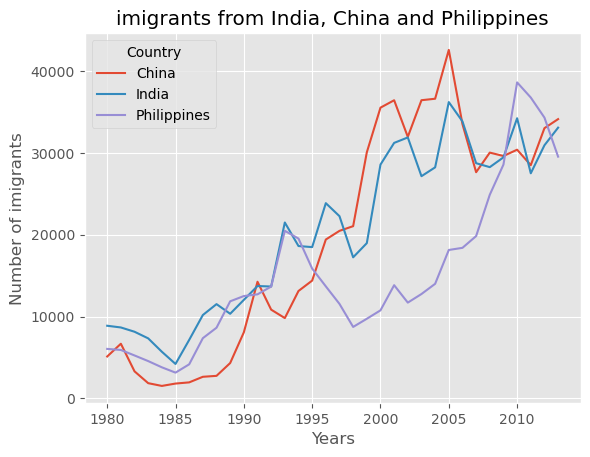

In [31]:
comp_trans.plot(kind='line')
plt.title('imigrants from India, China and Philippines')
plt.xlabel('Years')
plt.ylabel('Number of imigrants')

Text(0, 0.5, 'Number of immigrants')

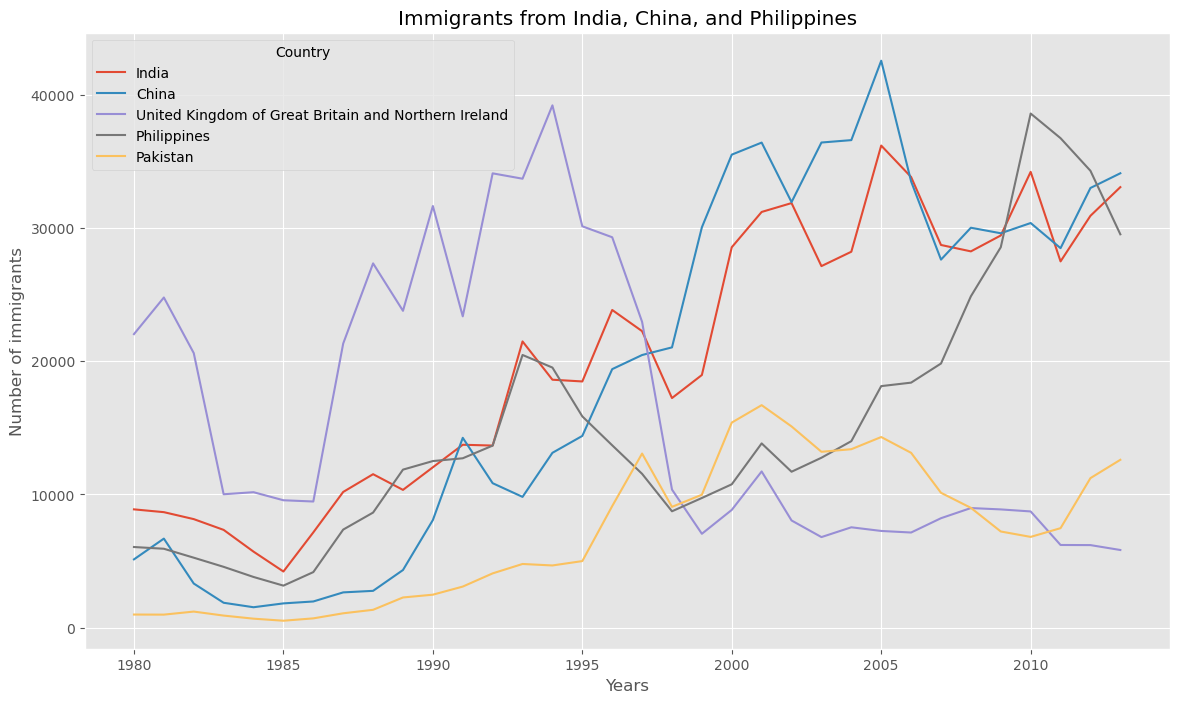

In [32]:
canada_immigration.sort_values(by='Total', ascending=False, axis=0, inplace=True)
top_5 = canada_immigration.head(5)
top_5 = top_5[years].transpose()

top_5.plot(kind='line', figsize=(14,8))
plt.title('Immigrants from India, China, and Philippines')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')

Text(0, 0.5, 'Number of immigrants')

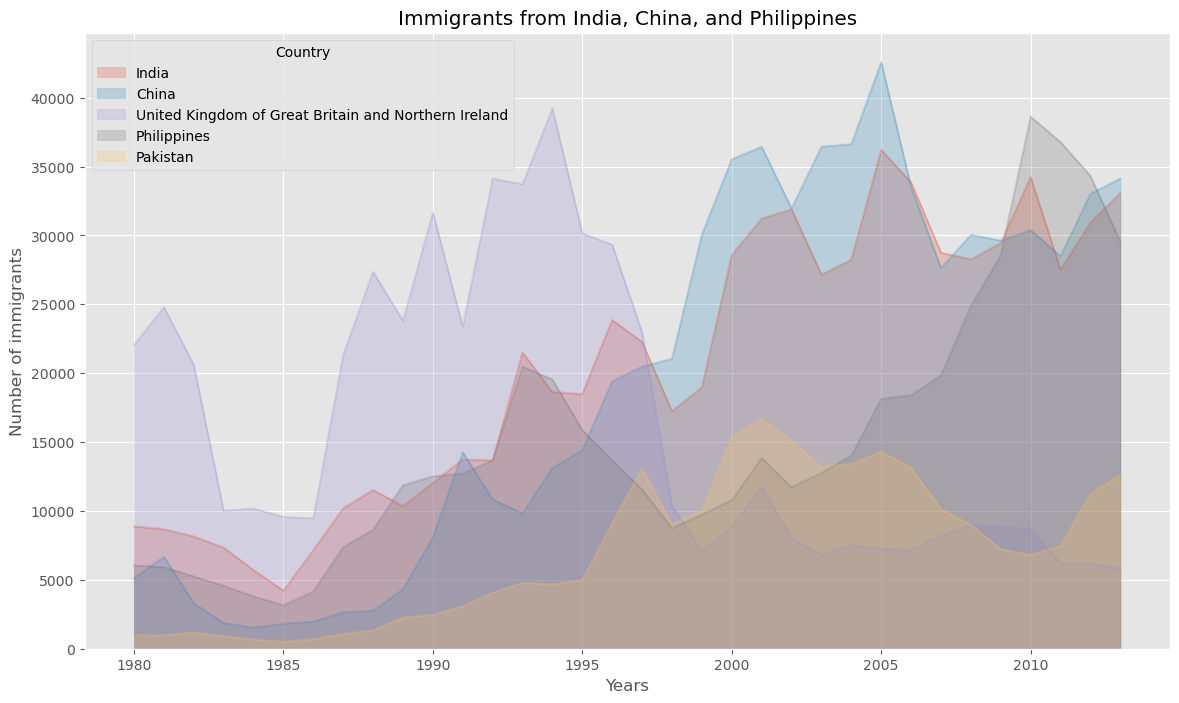

In [33]:
canada_immigration.sort_values(by='Total', ascending=False, axis=0, inplace=True)
top_5 = canada_immigration.head(5)
top_5 = top_5[years].transpose()

top_5.plot(kind='area', 
           alpha=0.25,
           stacked=False,
           figsize=(14,8))
plt.title('Immigrants from India, China, and Philippines')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')


Text(0, 0.5, 'Number of immigrants')

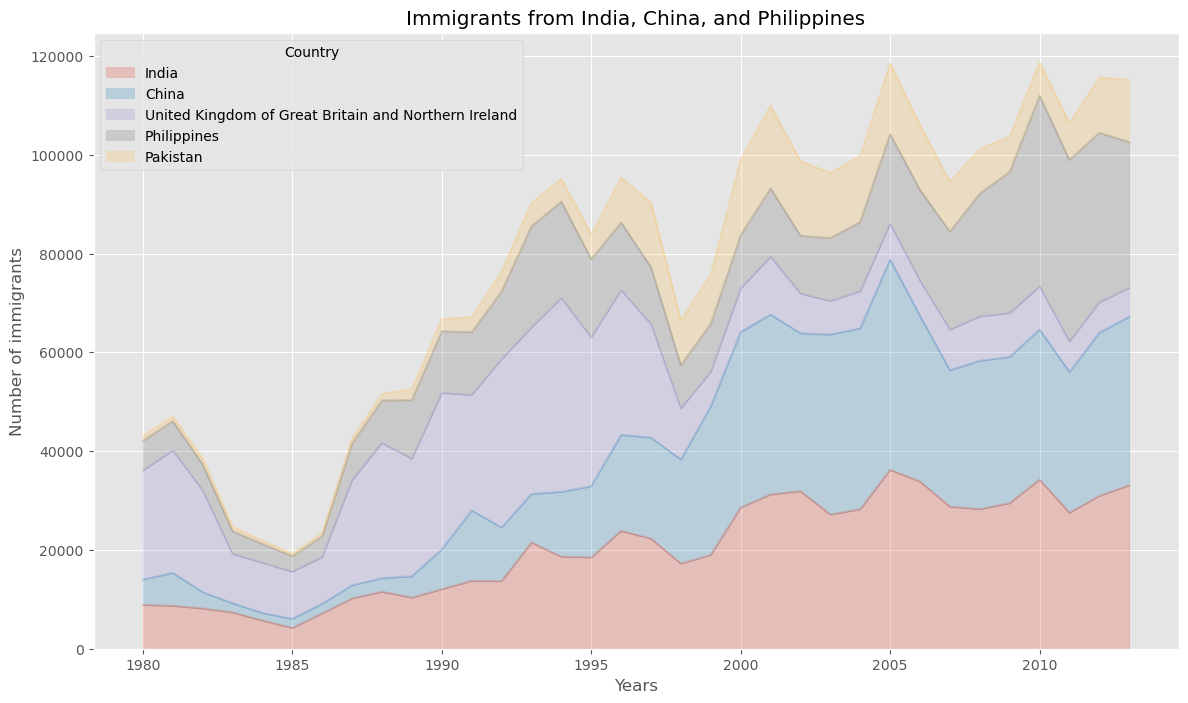

In [34]:
canada_immigration.sort_values(by='Total', ascending=False, axis=0, inplace=True)
top_5 = canada_immigration.head(5)
top_5 = top_5[years].transpose()

top_5.plot(kind='area', 
           alpha=0.25,
           stacked=True,
           figsize=(14,8))
plt.title('Immigrants from India, China, and Philippines')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')

Text(0, 0.5, 'Number of Immigrants')

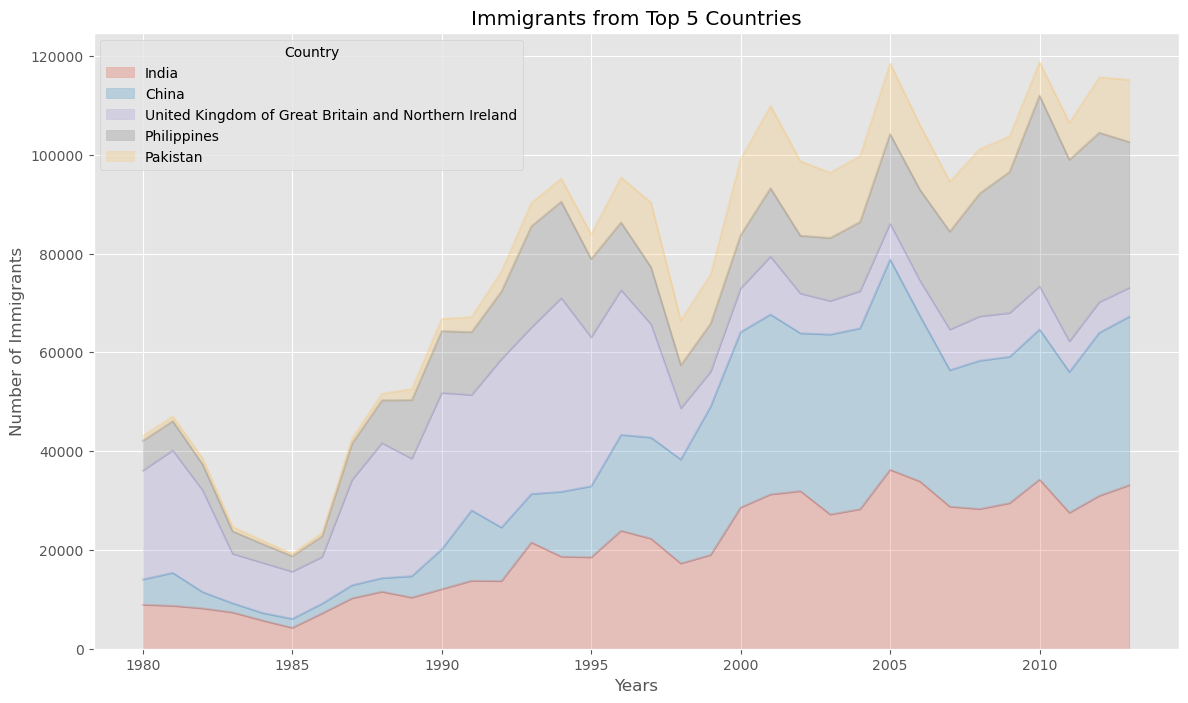

In [35]:
# canada_immigration.sort_values(by='Total', ascending=False, axis=0, inplace=True)
top_5 = canada_immigration.head(5)
top_5 = top_5[years].transpose()

ax = top_5.plot(kind='area', 
           alpha=0.25,
           stacked=True,
           figsize=(14,8))

ax.set_title("Immigrants from Top 5 Countries")
ax.set_xlabel("Years")
ax.set_ylabel("Number of Immigrants")


# Histogram

In [36]:
canada_immigration[2013].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [37]:
count, bin_edges = np.histogram(canada_immigration[2013],bins=10)

In [38]:
print(count)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


Text(0.5, 0, 'Number of Immigrants')

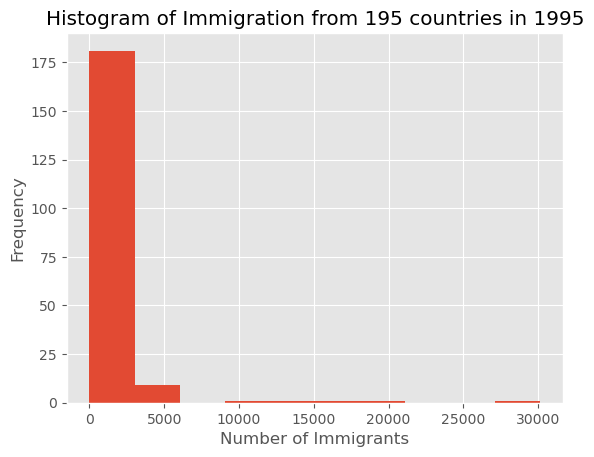

In [39]:
ax = canada_immigration[1995].plot(kind='hist')

ax.set_title("Histogram of Immigration from 195 countries in 1995")
ax.set_xlabel("Number of Immigrants")

<AxesSubplot:ylabel='Frequency'>

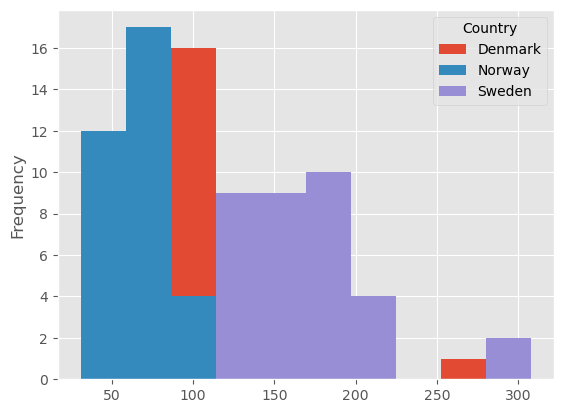

In [40]:
canada_immigration.loc[["Denmark", "Norway", "Sweden"], years].transpose().plot(kind='hist')

Text(0.5, 1.0, 'Histogram of Immigrants from Denmark, Norway and Sweden')

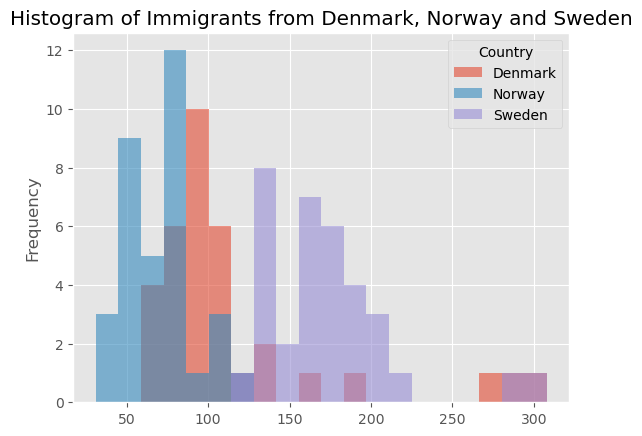

In [41]:
scand_data = canada_immigration.loc[["Denmark", "Norway", "Sweden"], years].transpose()

ax = scand_data.plot(
    kind='hist',
    alpha=0.6,
    bins=20
)
ax.set_title("Histogram of Immigrants from Denmark, Norway and Sweden")


Text(0.5, 1.0, 'Histogram of Immigrants from Denmark, Norway and Sweden')

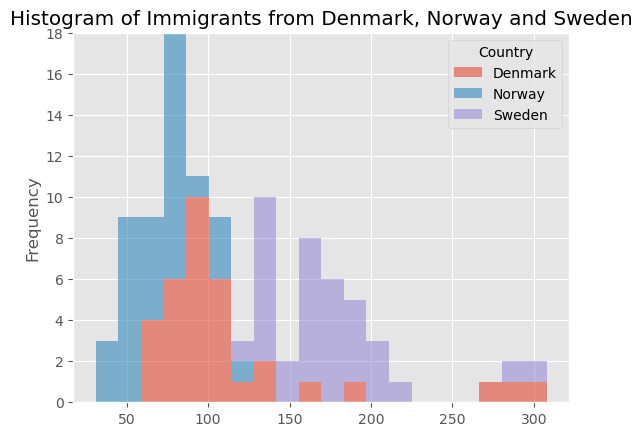

In [42]:
scand_data = canada_immigration.loc[["Denmark", "Norway", "Sweden"], years].transpose()

ax = scand_data.plot(
    kind='hist',
    alpha=0.6,
    bins=20,
    stacked=True
)
ax.set_title("Histogram of Immigrants from Denmark, Norway and Sweden")


# Barplot

In [43]:
indonesia_data = canada_immigration.loc['Indonesia', years]

In [44]:
indonesia_data

1980     186
1981     178
1982     252
1983     115
1984     123
1985     100
1986     127
1987     213
1988     270
1989     260
1990     227
1991     252
1992     243
1993     278
1994     262
1995     205
1996     231
1997     166
1998     165
1999     525
2000    1138
2001     907
2002     709
2003     515
2004     552
2005     632
2006     613
2007     657
2008     661
2009     504
2010     712
2011     390
2012     395
2013     387
Name: Indonesia, dtype: object

Text(0.5, 1.0, 'Indonesian immigrants to Canda from 1980 to 2013')

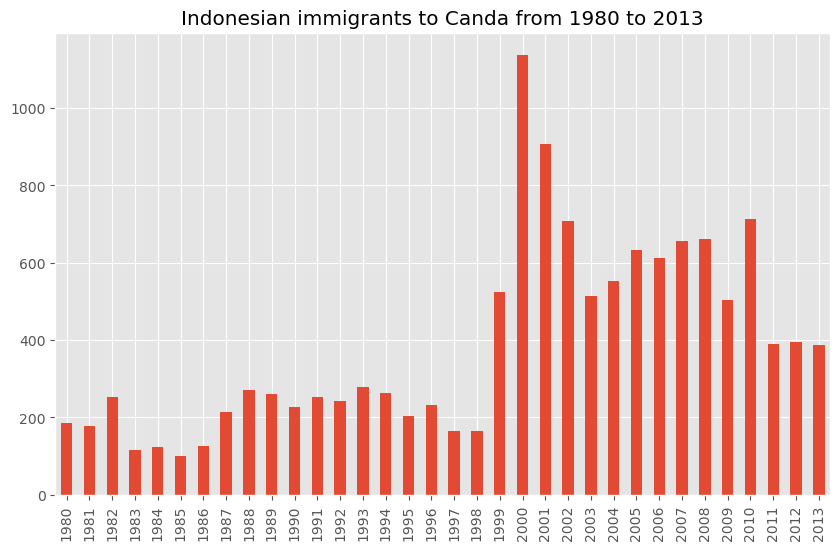

In [45]:
ax = indonesia_data.plot(
    kind='bar'
    ,figsize=(10,6)
)

ax.set_title("Indonesian immigrants to Canda from 1980 to 2013")

In [46]:
canada_immigration

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2


In [50]:
top_5

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


Text(0.5, 0, 'Number of Immigrants')

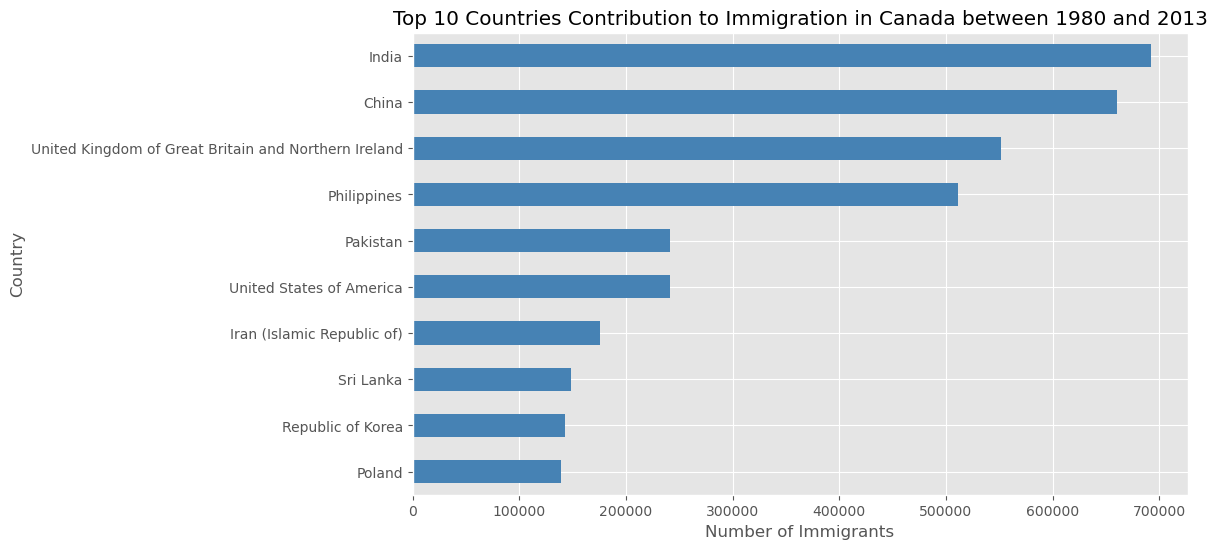

In [51]:
canada_immigration.sort_values(by='Total', ascending=True, inplace=True)
top_10  = canada_immigration['Total'].tail(10)

ax = top_10.plot(
    kind='barh'
    ,figsize=(10,6)
    ,color='steelblue'
)

ax.set_title('Top 10 Countries Contribution to Immigration in Canada between 1980 and 2013')
ax.set_xlabel("Number of Immigrants")


# ax.set_title("Indonesian immigrants to Canda from 1980 to 2013")

# Pie Chart

In [52]:
continent_data = canada_immigration.groupby("Continent", axis=0).sum()

In [53]:
continent_data

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


<AxesSubplot:ylabel='Total'>

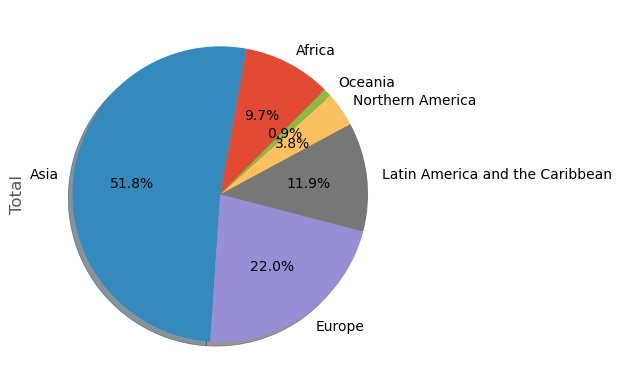

In [54]:
continent_data['Total'].plot(
    kind='pie'
    ,autopct='%1.1f%%'
    ,startangle=45
    ,shadow=True
)

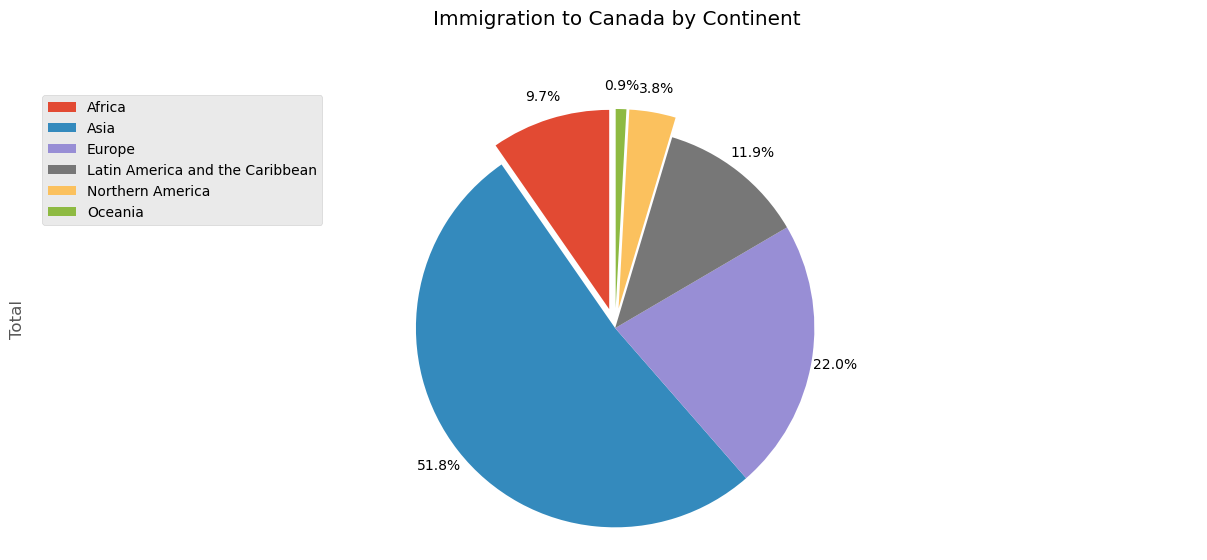

In [55]:
color_list = ["gold", "yellowgreen", "lightcoral", "lightskyblue", "lightgreen", "pink"]


continent_data['Total'].plot(
    kind='pie'
    ,figsize=(15,6)
    ,autopct='%1.1f%%'
    ,startangle=90
    # ,shadow=True
    ,labels=None
    # ,colors=color_list
    ,pctdistance=1.12
    ,explode = [0.1,0,0,0,.1,.1]
)

plt.title("Immigration to Canada by Continent", y=1.12)
plt.axis('equal')
plt.legend(labels=continent_data.index, loc='upper left')


# Box Plots

Q1
Q2
Q3

IQR = Q3 - Q1
Max = Q3 + (1.5 * IQR)
Min = Q1 - (1.5 * IQR)

<AxesSubplot:>

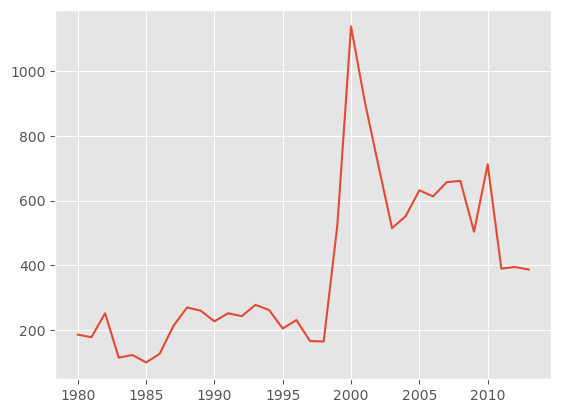

In [56]:
indonesia_data.plot()

<AxesSubplot:>

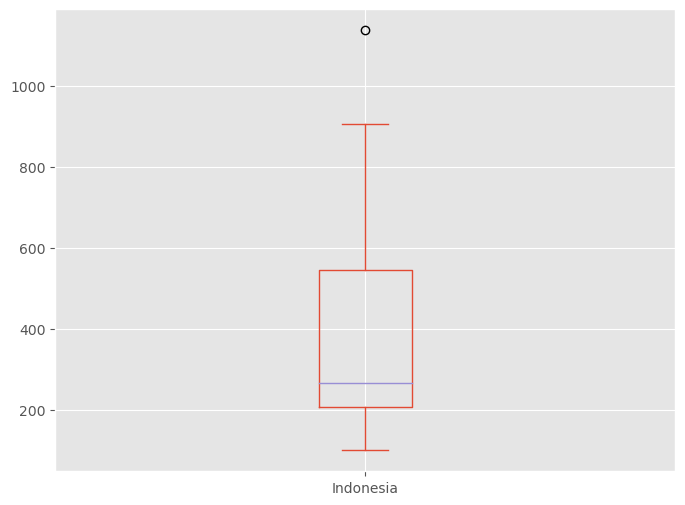

In [57]:
indonesia_data.plot(kind='box', figsize=(8,6))

In [58]:
indonesia_data.astype(int).describe()

count      34.000000
mean      386.764706
std       251.233449
min       100.000000
25%       207.000000
50%       266.000000
75%       545.250000
max      1138.000000
Name: Indonesia, dtype: float64

In [59]:
iqr = 545.250000 - 207.000000


max_box = 545.250000 + (1.5*iqr)

In [60]:
max_box

1052.625

In [61]:
china_india = canada_immigration.loc[["China", "India"], years].transpose()

In [62]:
china_india.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


<AxesSubplot:>

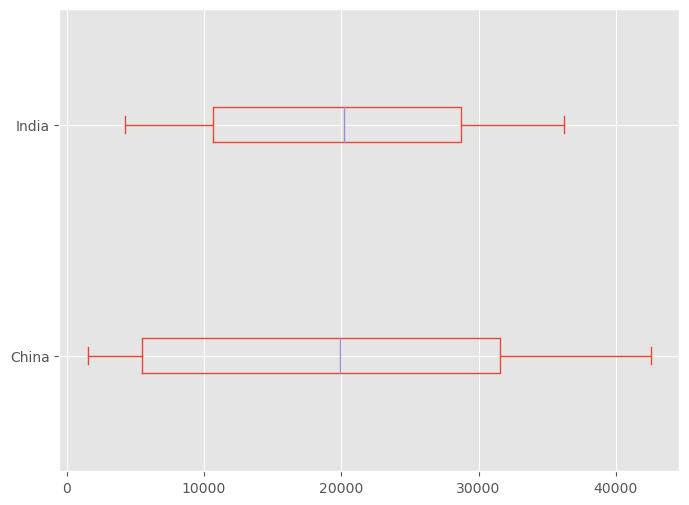

In [63]:
china_india.plot(kind='box', figsize=(8,6), vert=False)

# Subplot

Text(0.5, 0, 'Years')

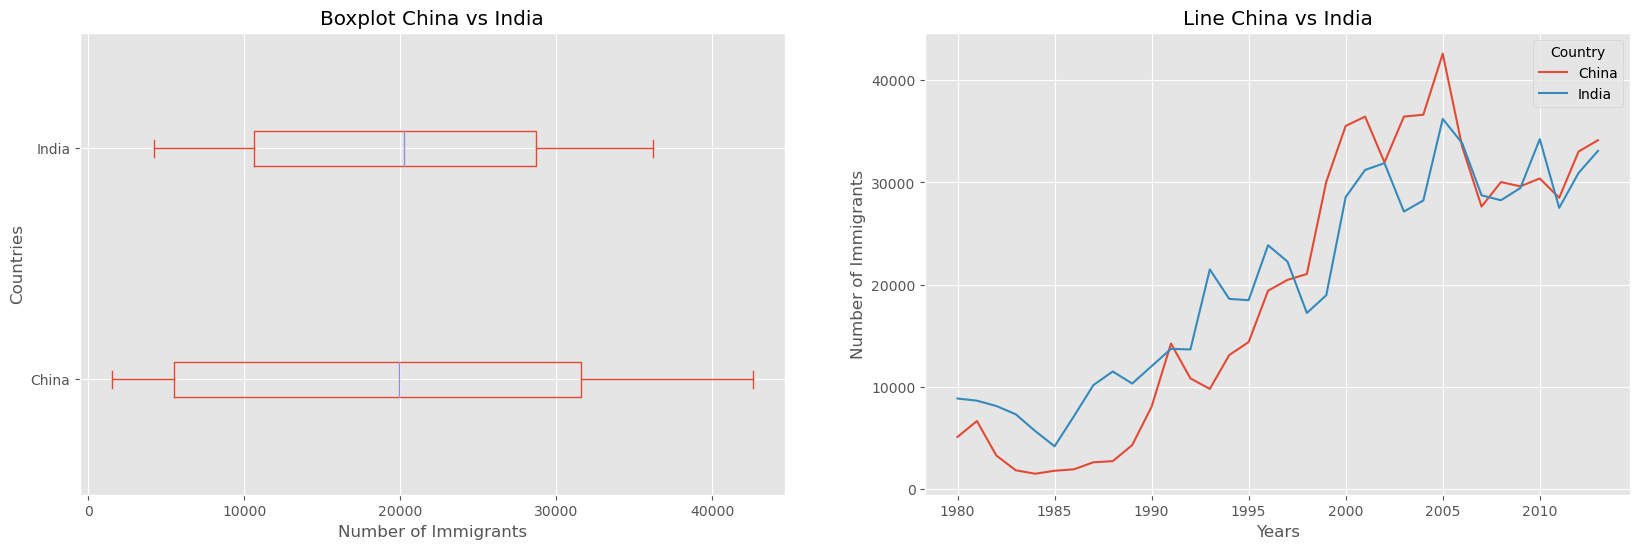

In [64]:
fig = plt.figure()

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)



china_india.plot(kind='box', figsize=(20,6), vert=False, ax=ax0)
ax0.set_title("Boxplot China vs India")
ax0.set_xlabel("Number of Immigrants")
ax0.set_ylabel("Countries")


china_india.plot(kind='line', figsize=(20,6), ax=ax1)
ax1.set_title("Line China vs India")
ax1.set_ylabel("Number of Immigrants")
ax1.set_xlabel("Years")



1=g1
2=g2

# Scatterplot

In [65]:
total_yearly = pd.DataFrame(canada_immigration[years].sum(axis=0))

In [66]:
total_yearly.index

Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013],
      dtype='object')

In [67]:
total_yearly.reset_index(inplace=True)

In [68]:
total_yearly.index

RangeIndex(start=0, stop=34, step=1)

In [69]:
total_yearly.columns = ["Year", "Total"]

In [70]:
total_yearly

,Year,Total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417
5,1985,69978
6,1986,86048
7,1987,134771
8,1988,139306
9,1989,164432


Text(0, 0.5, 'Num of Immigrants')

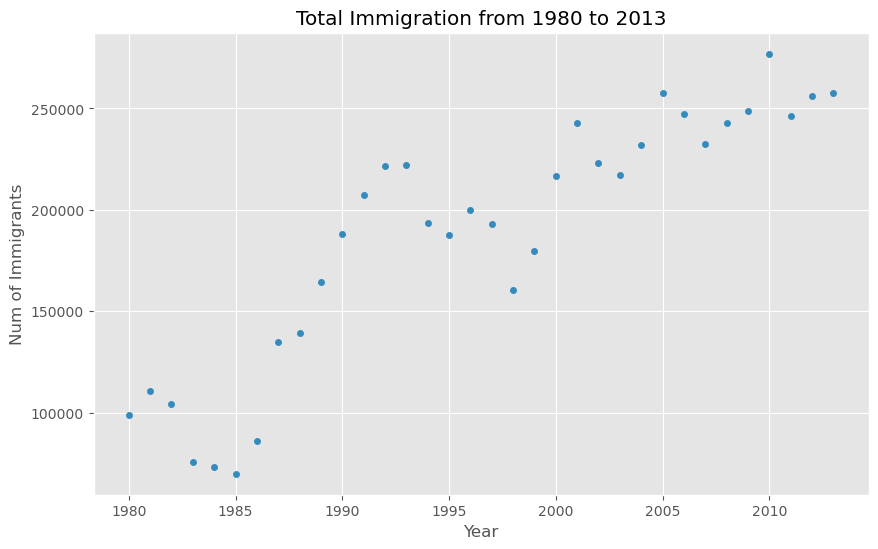

In [71]:
ax = total_yearly.plot(
    kind='scatter'
    ,x='Year'
    ,y='Total'
    ,figsize=(10,6)
)

ax.set_title("Total Immigration from 1980 to 2013")
ax.set_xlabel("Year")
ax.set_ylabel("Num of Immigrants")